#Dla danych “CIFAR10 small image classification” z biblioteki Keras zaproponuj i zrealizuj podział tych danych na dane treningowe i dane testowe,

In [ ]:
from keras.datasets import cifar10
from matplotlib import pyplot as plt
from keras.utils import to_categorical
import numpy as np

data = cifar10.load_data()

(train_x, train_y), (test_x, test_y) = cifar10.load_data()

train_x = train_x.astype('float32')/255
test_x= test_x.astype('float32')/255

train_y = to_categorical(train_y, 10)

test_y = to_categorical(test_y, 10)

X=data[0][0].astype('float32') / 255.0
y=to_categorical(data[0][1])

#for i in range(10):
  #print(y[i])
  #plt.imshow(X[i])
  #plt.show()

170500096/170498071 [==============================] - 11s 0us/step


#W oparciu o sieć konwolucyjną, zgodnie z wskazaniami prowadzącego, zaproponuj klasyfikator, klasyfikujący dwie z dziesięciu klas



In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X, y, epochs=20, batch_size=64, validation_data=(X, y))

model.save('miw_sXXXXX_f_{}_model_fit.h5'.format(1))

Epoch 1/20
782/782 [==============================] - 37s 10ms/step - loss: 1.7521 - accuracy: 0.3787 - val_loss: 1.6025 - val_accuracy: 0.4345
Epoch 2/20
782/782 [==============================] - 7s 8ms/step - loss: 1.3037 - accuracy: 0.5485 - val_loss: 1.2479 - val_accuracy: 0.5642
Epoch 3/20
782/782 [==============================] - 7s 8ms/step - loss: 1.1947 - accuracy: 0.5855 - val_loss: 1.1329 - val_accuracy: 0.6126
Epoch 4/20
782/782 [==============================] - 7s 9ms/step - loss: 1.1152 - accuracy: 0.6154 - val_loss: 1.1815 - val_accuracy: 0.5821
Epoch 5/20
782/782 [==============================] - 7s 8ms/step - loss: 1.0525 - accuracy: 0.6395 - val_loss: 1.1006 - val_accuracy: 0.6191
Epoch 6/20
782/782 [==============================] - 7s 8ms/step - loss: 1.0147 - accuracy: 0.6525 - val_loss: 1.0364 - val_accuracy: 0.6481
Epoch 7/20
782/782 [==============================] - 7s 8ms/step - loss: 0.9782 - accuracy: 0.6649 - val_loss: 1.0181 - val_accuracy: 0.6500
Epoc

In [ ]:
from tensorflow import keras
model = keras.models.load_model('miw_sXXXXX_f_{}_model_fit.h5'.format(1))
loss, acc = model.evaluate(X, y, verbose=0)
print('accuracy: {}'.format(acc))
print('loss: {}'.format(loss))

accuracy: 0.7143800258636475
loss: 0.8353374004364014


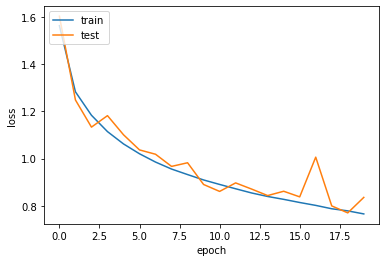

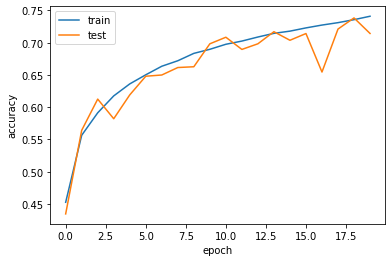

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Zaproponuj klasyfikator z jedną, dwiema oraz trzema warstwami konwolucyjnymi,

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history3 = model.fit(train_x, train_y, epochs=30, batch_size=128, validation_data=(test_x, test_y))
model.save('trzy_warstwy.h5')


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model.fit(train_x, train_y, epochs=60, batch_size=128, validation_data=(test_x, test_y))

model.save('dwie_warstwy.h5')

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history1 = model.fit(train_x, train_y, epochs=90, batch_size=128, validation_data=(test_x, test_y))

model.save('jedna_warstwy.h5')

Epoch 1/30
391/391 [==============================] - 7s 15ms/step - loss: 1.9820 - accuracy: 0.2744 - val_loss: 1.5210 - val_accuracy: 0.4348
Epoch 2/30
391/391 [==============================] - 5s 14ms/step - loss: 1.4335 - accuracy: 0.4867 - val_loss: 1.3337 - val_accuracy: 0.5249
Epoch 3/30
391/391 [==============================] - 5s 13ms/step - loss: 1.2258 - accuracy: 0.5679 - val_loss: 1.1465 - val_accuracy: 0.5913
Epoch 4/30
391/391 [==============================] - 5s 13ms/step - loss: 1.0815 - accuracy: 0.6238 - val_loss: 1.0294 - val_accuracy: 0.6370
Epoch 5/30
391/391 [==============================] - 5s 13ms/step - loss: 0.9755 - accuracy: 0.6598 - val_loss: 1.0299 - val_accuracy: 0.6425
Epoch 6/30
391/391 [==============================] - 5s 13ms/step - loss: 0.8876 - accuracy: 0.6894 - val_loss: 1.0407 - val_accuracy: 0.6321
Epoch 7/30
391/391 [==============================] - 5s 13ms/step - loss: 0.8126 - accuracy: 0.7173 - val_loss: 0.8956 - val_accuracy: 0.6911

#Porównaj wyniki z poprzedniego punktu i zaproponuj optymalny klasyfikator dla danego problemu.

3 warstwy: 
accuracy: 0.6938999891281128
loss: 1.972100019454956


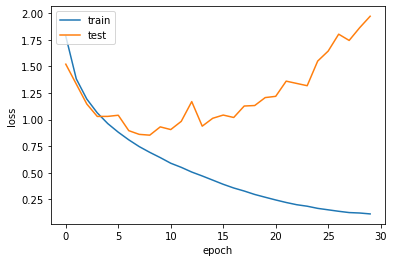

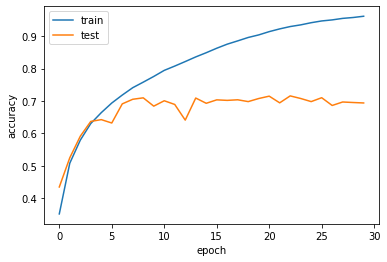

2 warstwy: 
accuracy: 0.6773999929428101
loss: 3.412475109100342


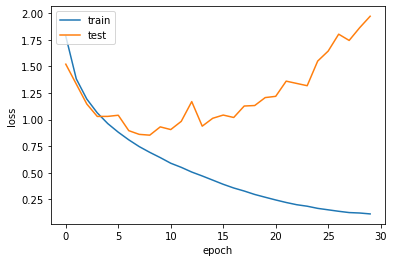

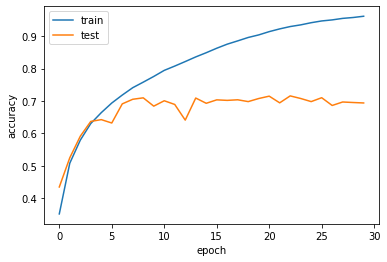

1 warstwy: 
accuracy: 0.5985000133514404
loss: 2.234142780303955


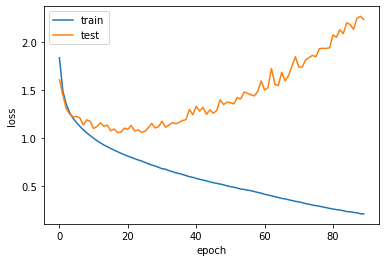

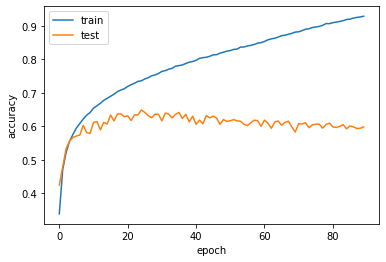

In [ ]:
from tensorflow import keras
model = keras.models.load_model('trzy_warstwy.h5')
loss, acc = model.evaluate(test_x, test_y, verbose=0)
print('3 warstwy: ')
print('accuracy: {}'.format(acc))
print('loss: {}'.format(loss))
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model = keras.models.load_model('dwie_warstwy.h5')
loss, acc = model.evaluate(test_x, test_y, verbose=0)
print('2 warstwy: ')
print('accuracy: {}'.format(acc))
print('loss: {}'.format(loss))
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model = keras.models.load_model('jedna_warstwy.h5')
loss, acc = model.evaluate(test_x, test_y, verbose=0)
print('1 warstwy: ')
print('accuracy: {}'.format(acc))
print('loss: {}'.format(loss))
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history3 = model.fit(train_x, train_y, epochs=10, batch_size=128, validation_data=(test_x, test_y))

Epoch 1/10
391/391 [==============================] - 17s 42ms/step - loss: 2.3713 - accuracy: 0.2130 - val_loss: 1.4854 - val_accuracy: 0.4734
Epoch 2/10
391/391 [==============================] - 17s 42ms/step - loss: 1.4377 - accuracy: 0.4913 - val_loss: 1.2853 - val_accuracy: 0.5604
Epoch 3/10
391/391 [==============================] - 17s 42ms/step - loss: 1.0926 - accuracy: 0.6211 - val_loss: 1.0284 - val_accuracy: 0.6459
Epoch 4/10
391/391 [==============================] - 16s 42ms/step - loss: 0.8493 - accuracy: 0.7049 - val_loss: 0.9711 - val_accuracy: 0.6725
Epoch 5/10
391/391 [==============================] - 16s 42ms/step - loss: 0.6300 - accuracy: 0.7836 - val_loss: 0.9959 - val_accuracy: 0.7011
Epoch 6/10
391/391 [==============================] - 16s 42ms/step - loss: 0.4322 - accuracy: 0.8518 - val_loss: 1.1456 - val_accuracy: 0.7042
Epoch 7/10
391/391 [==============================] - 16s 42ms/step - loss: 0.3122 - accuracy: 0.8945 - val_loss: 1.2358 - val_accuracy: